# EE5175 Lab 9 : K-means Clustering
Author: Kishore Rajendran [EE20B064]

Date: 18 April 2024

In [8]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import trange

## K-means clustering
It is an unsupervised learning algorithm which is able to cluster a given dataset into K clusters where K is an input to the algorithm. We use euclidean distance as the distance measuring metric in this case. Each data point has 3 dimensions, ie. [r, g, b] values of the pixel.

The below defined function takes an image, k, maximum number of iterations and the inital centroids as input, and returns the final centroids, classes of each pixel in the input image and the sum squared error associated with it.

In [9]:
def kmeans(img, k, init_centroids, max_iter):
    centroids = init_centroids
    prev_centroids = np.zeros_like(init_centroids)
    iter = 0
    # Keep iterating till the centroids converge or till max number of iterations
    while not np.array_equal(centroids, prev_centroids):
        # Initializing an array consisting of the classes and squared error of each sample (pixel) in the dataset (img)
        classes = np.ones((img.shape[0], img.shape[1]), dtype=int) * -1
        se_vals = np.zeros((img.shape[0], img.shape[1]))
        # Assigning each point in the dataset (img) to the nearest centroid and calculating squared error for all samples
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                classes[x,y] = np.nanargmin(np.sum((img[x,y] - centroids)**2, axis=1))
                se_vals[x,y] = np.sum((img[x,y] - centroids[classes[x,y]])**2)
        # Calculating sum squared error
        sse = np.sum(se_vals)
        # Re-computing the cluster centroids
        prev_centroids = centroids
        for i in range(k):
            id = np.where(classes == i)
            # If cluster is empty, re-initalize its centroid randomly
            if id[0].shape[0] == 0:
                centroids[i] = np.random.randint(256, size = (1, 3))
            # Else assign the mean value of all the samples in that cluster
            else:
                centroids[i] = np.mean(img[id], axis=0)
        # Update no. of iterations and break if max number is crossed
        iter+=1
        if(iter>max_iter):
            break
    return centroids, classes, sse

#### Generating segmented image
To generate the segmented image, given the classes to which each pixel belongs, we assign its value to the centroid of the cluster it belongs to.

In [10]:
# Generate segmented image
def generate_segmented_img(img, k, centroids, classes):
    seg_img = np.zeros_like(img)
    for i in range(k):
        id = np.where(classes == i)
        seg_img[id] = centroids[i]
    return seg_img

### (A) K-means with given initial cluster means

Here we have been given the inital cluster means as:
$$
c_{init} = [[255,0,0], [0,0,0], [255, 255, 255]]
$$

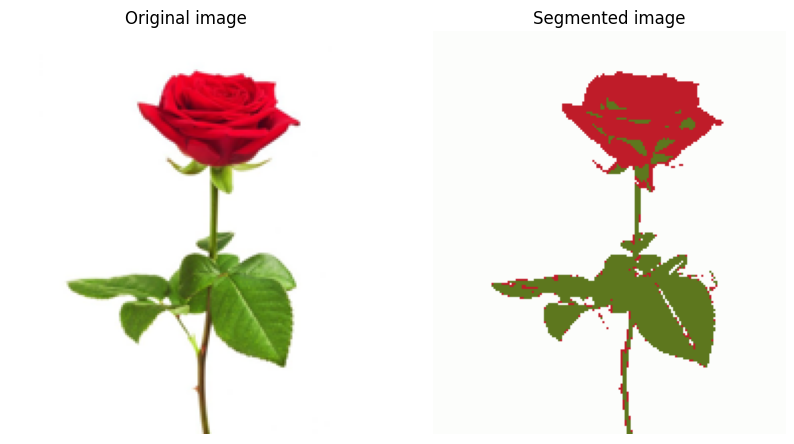

In [11]:
# Importing the image as numpy array
img1 = np.array(Image.open("flower.png"))

# Defining the parameters
k = 3
c_init = np.array([[255,0,0], [0,0,0], [255, 255, 255]])
max_iters = 5

# Running the k-means algorithm and generating the segmented image
centroids1, classes1, _ = kmeans(img1, k, c_init, max_iters)
seg_img1 = generate_segmented_img(img1, k, centroids1, classes1)

# Plotting the images side by side
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis('off')

ax[1].imshow(seg_img1, cmap='gray')
ax[1].set_title("Segmented image")
ax[1].axis('off')

plt.show()

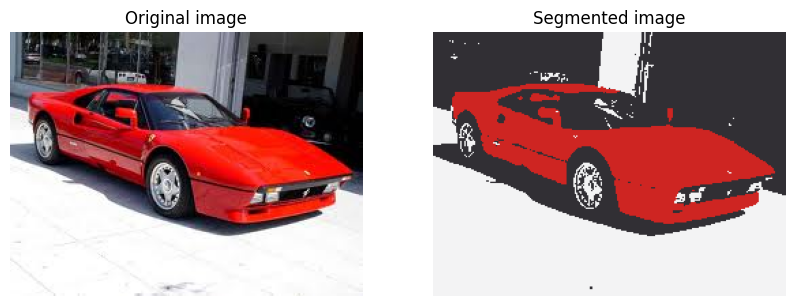

In [12]:
# Importing the image as numpy array
img2 = np.array(Image.open("car.png"))

# Running the k-means algorithm and generating the segmented image
centroids2, classes2, _ = kmeans(img2, k, c_init, max_iters)
seg_img2 = generate_segmented_img(img2, k, centroids2, classes2)

# Plotting the images side by side
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis('off')

ax[1].imshow(seg_img2, cmap='gray')
ax[1].set_title("Segmented image")
ax[1].axis('off')

plt.show()

### (B) K-means with random initial cluster means
Here we randomly initialize the cluster centroids and run K-means for N=30 iterations, then we pick the centroids with least sse (cost) associated with them. We are asked to compare the outputs obtained for the lowest and highest values of cost obtained over the 30 iterations.

100%|██████████| 30/30 [00:18<00:00,  1.58it/s]


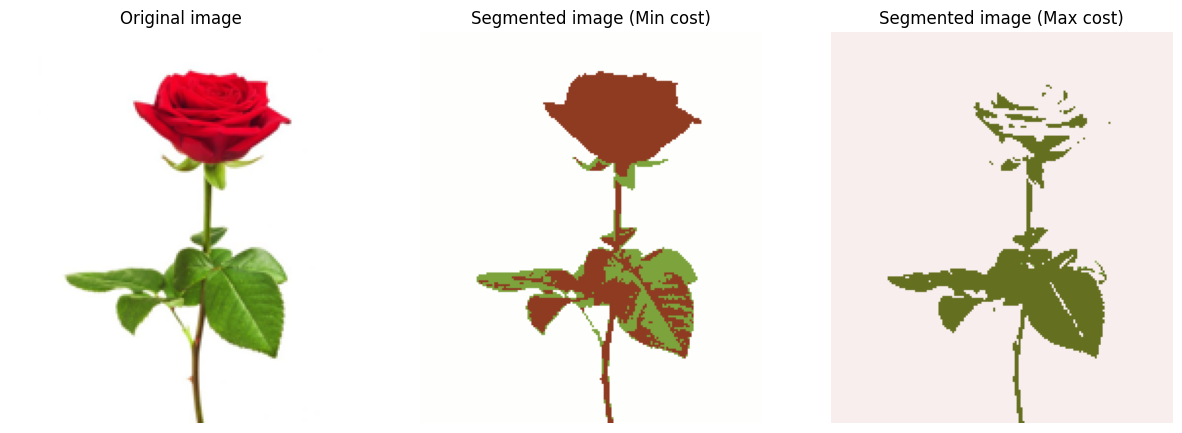

In [20]:
# Defining the parameters
N = 30
k = 3
max_iters = 5

centroids = []
classes = []
costs = []

for i in trange(N):
    # Generating random values for initial value of centroids
    init_centroids = np.random.randint(256, size = (k, 3))
    cent, cla, sse = kmeans(img1, k, init_centroids, max_iters)
    centroids.append(cent)
    classes.append(cla)
    costs.append(sse)

mini = np.nanargmin(costs)
maxi = np.nanargmax(costs)

seg_img1_min = generate_segmented_img(img1, k, centroids[mini], classes[mini])
seg_img1_max = generate_segmented_img(img1, k, centroids[maxi], classes[maxi])

# Plotting the images side by side
fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis('off')

ax[1].imshow(seg_img1_min, cmap='gray')
ax[1].set_title("Segmented image (Min cost)")
ax[1].axis('off')

ax[2].imshow(seg_img1_max, cmap='gray')
ax[2].set_title("Segmented image (Max cost)")
ax[2].axis('off')

plt.show()

100%|██████████| 30/30 [00:26<00:00,  1.12it/s]


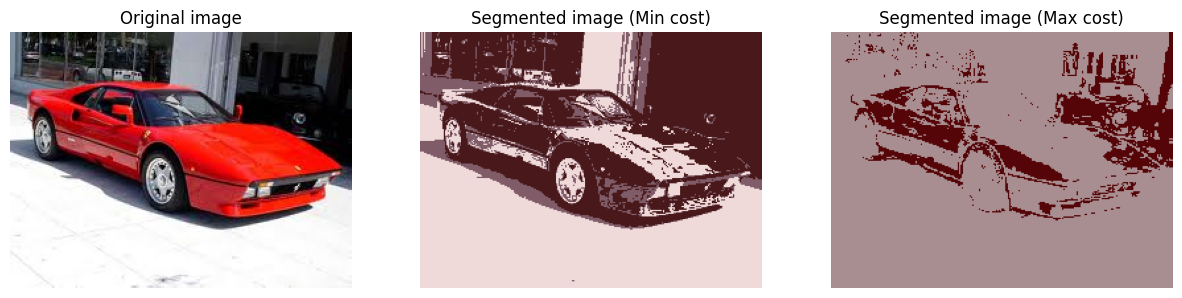

In [19]:
# Defining the parameters
N = 30
k = 3
max_iters = 5

centroids = []
classes = []
costs = []

for i in trange(N):
    # Generating random values for initial value of centroids
    init_centroids = np.random.randint(256, size = (k, 3))
    cent, cla, sse = kmeans(img2, k, init_centroids, max_iters)
    centroids.append(cent)
    classes.append(cla)
    costs.append(sse)

mini2 = np.nanargmin(costs)
maxi2 = np.nanargmax(costs)

seg_img2_min = generate_segmented_img(img2, 3, centroids[mini2], classes[mini2])
seg_img2_max = generate_segmented_img(img2, 3, centroids[maxi2], classes[maxi2])

# Plotting the images side by side
fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis('off')

ax[1].imshow(seg_img2_min, cmap='gray')
ax[1].set_title("Segmented image (Min cost)")
ax[1].axis('off')

ax[2].imshow(seg_img2_max, cmap='gray')
ax[2].set_title("Segmented image (Max cost)")
ax[2].axis('off')

plt.show()

# Observations
1. The given inital centroids are the colours red, black and white, which are quite close to all the colours present in the car image. Thus, the segmented image for the car looks really good.
2. Whereas, for the flower, this initialization is decent, but not the best possible. Thus the segmented image suffers a bit, compared to the car.
3. In the random initalizations case, we observe different results everytime the code is run, most of which are quite bad. Also the clustering with minimum cost is almost always better than the one with the maximum cost, which makes sense.
4. Clearly, K-means is highly dependent on its initalization since this is a greedy algorithm which ends up finding the local optima. Hence, carefully choosing the inital centroids can help us get better segmented images.